### 01. 필요한 라이브러리 설치

In [8]:
!pip install FastAPI -q
!pip install uvicorn -q
!pip install torch
!pip install python-multipart
!pip install fastapi nest-asyncio pyngrok uvicorn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


### 02. FastAPI 실행

- 학습때 설치했던 yolov5 폴더가 있는 경로로 이동해주세요.

In [9]:
cd /Users/jiwonchoi/comento/1

/Users/jiwonchoi/comento/1


- 학습한 모델을 로드해줍니다.

In [10]:
import os
import torch
import uvicorn
import nest_asyncio

from PIL import Image
from io import BytesIO
from pyngrok import ngrok
from torchvision import transforms
from fastapi import FastAPI, File, UploadFile

# FastAPI 앱 생성
app = FastAPI()

# YOLOv5 모델 로드
model = torch.hub.load('yolov5', 'custom', path='/Users/jiwonchoi/comento/1/yolov5/runs/train/yolov5s_results/weights/best.pt', source='local')  # 학습한 모델의 경로를 'path'인자에 넣어주세요 (ex, 'yolov5/runs/train/yolov5s_results4/weights/best.pt')
model.conf = 0.4  # 신뢰도 임계값 설정

# ngrok 인증 토큰 설정
authtoken = "2r20wWaMfVz9lU1e97XJSDdF2yn_4o6cwC1j2oNbbK2TJZTHo" # 자신의 인증 토큰으로 변경하세요
ngrok.set_auth_token(authtoken)

YOLOv5 🚀 v7.0-397-gde62f93c Python-3.9.18 torch-2.5.1 CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


### fastapi 실행 함수 구현
- Input : 이미지 경로
- Output : 자유롭게 아이디어를 내서 결과를 출력시켜주세요.
  - 차량 정체 문제를 파악하기 위한 값으로 출력해주세요.
  - 예를 들어, 차량 개수 파악 / 차량 전체 면적 또는 비율 등 다양한 아이디어를 생각해서 구현해주세요.

In [11]:
from PIL import Image
import io

@app.post('/detect')
async def detect_api(file: UploadFile = File(...)):

    # 비동기적으로 파일 읽기
    image_bytes = await file.read()

    try:
        # RGB형태로 이미지 열기
        # 코드 입력해주세요.
        # RGB형태로 이미지 열기
        image = Image.open(io.BytesIO(image_bytes)).convert("RGB")

        # YOLOv5 모델 추론
        # 코드 입력해주세요.
        #model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)
        results = model(image, size=224)
        results_df = results.pandas().xyxy[0]

        # 결과 처리 (원하는 결과물로 수정해도 좋습니다.)
        detections_list = []
        for index, row in results_df.iterrows():
            detections_list.append({
                "x1": float(row['xmin']),
                "y1": float(row['ymin']),
                "x2": float(row['xmax']),
                "y2": float(row['ymax']),
                "confidence": float(row['confidence']),
                "class": int(row['class'])
            })

        return {"detections": detections_list}

    except Exception as e:
        return {"error": "이미지 처리 실패", "details": str(e)}

# ngrok 터널 설정
port = 8000
public_url = ngrok.connect(port)
print(f"Public URL: {public_url}")

# colab에서 비동기 실행 문제 해결
nest_asyncio.apply()

# FastAPI 서버 실행
uvicorn.run(app, host="0.0.0.0", port=port)


Public URL: NgrokTunnel: "https://9178-218-235-241-40.ngrok-free.app" -> "http://localhost:8000"


INFO:     Started server process [16834]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [16834]


## yolo5:  json 파일을 이용한 ngrok의 시각화 확인하기

Task exception was never retrieved
future: <Task finished name='Task-4' coro=<Server.serve() done, defined at /opt/homebrew/anaconda3/envs/conda/lib/python3.9/site-packages/uvicorn/server.py:68> exception=KeyboardInterrupt()>
Traceback (most recent call last):
  File "/opt/homebrew/anaconda3/envs/conda/lib/python3.9/site-packages/uvicorn/main.py", line 579, in run
    server.run()
  File "/opt/homebrew/anaconda3/envs/conda/lib/python3.9/site-packages/uvicorn/server.py", line 66, in run
    return asyncio.run(self.serve(sockets=sockets))
  File "/opt/homebrew/anaconda3/envs/conda/lib/python3.9/site-packages/nest_asyncio.py", line 30, in run
    return loop.run_until_complete(task)
  File "/opt/homebrew/anaconda3/envs/conda/lib/python3.9/site-packages/nest_asyncio.py", line 92, in run_until_complete
    self._run_once()
  File "/opt/homebrew/anaconda3/envs/conda/lib/python3.9/site-packages/nest_asyncio.py", line 133, in _run_once
    handle._run()
  File "/opt/homebrew/anaconda3/envs/con

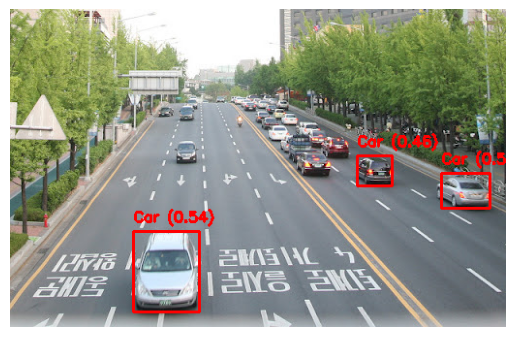

In [12]:
%matplotlib inline
import json
import cv2
import matplotlib.pyplot as plt

# 🔹 JSON 파일 불러오기
json_path = "/Users/jiwonchoi/comento/1/json/response_1738422919231.json"  # JSON 파일 경로 (다운받은 파일 이름으로 변경)
with open(json_path, "r") as file:
    data = json.load(file)

# 🔹 이미지 불러오기
image_path = "/Users/jiwonchoi/comento/1/api_test.png"  # 이미지 파일 경로
image = cv2.imread(image_path)

# 이미지가 제대로 로드되지 않았다면 경고 메시지 출력
if image is None:
    raise ValueError("이미지가 로드되지 않았습니다! 경로를 확인하세요.")

# BGR → RGB 변환 (OpenCV는 BGR로 이미지를 로드하므로 변환 필요)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 🔹 탐지된 객체 정보 가져오기
detections = data.get("detections", [])  # 'detections' 키의 값을 가져옴

# 클래스 이름 매핑 (필요하면 수정)
class_names = {0: "Car"}

# 🔹 바운딩 박스 그리기
for obj in detections:
    x1, y1, x2, y2 = int(obj["x1"]), int(obj["y1"]), int(obj["x2"]), int(obj["y2"])
    confidence = obj["confidence"]
    label = class_names.get(obj["class"], f"Class {obj['class']}")

    # 바운딩 박스 및 라벨 표시
    cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)  # 파란색 바운딩 박스
    cv2.putText(image, f"{label} ({confidence:.2f})", (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# 🔹 결과 출력
plt.imshow(image)
plt.axis("off")  # 축 제거
plt.show()


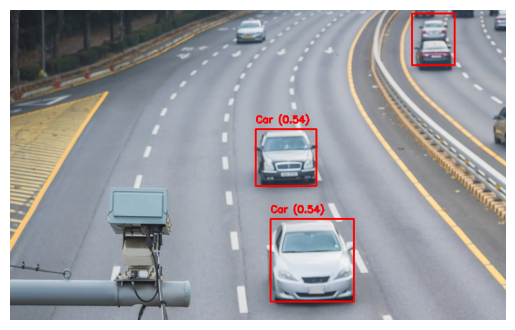

In [13]:
#test.png 의 결과 시각화

# 이미지 로드
image = cv2.imread("/Users/jiwonchoi/comento/1/test.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 탐지된 객체 정보
detections = [
    {"x1": 380.92, "y1": 184.10, "x2": 474.72, "y2": 272.03, "confidence": 0.537, "class": 0},
    {"x1": 403.93, "y1": 323.34, "x2": 532.50, "y2": 451.67, "confidence": 0.536, "class": 0},
    {"x1": 622.36, "y1": 5.13, "x2": 688.42, "y2": 85.58, "confidence": 0.460, "class": 0}
]

# 클래스 이름 매핑 (예제, 실제 값 확인 필요)
class_names = {0: "Car"}

# 바운딩 박스 그리기
for obj in detections:
    x1, y1, x2, y2 = int(obj["x1"]), int(obj["y1"]), int(obj["x2"]), int(obj["y2"])
    label = class_names.get(obj["class"], "Unknown")
    confidence = obj["confidence"]

    # 사각형 그리기
    cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)
    cv2.putText(image, f"{label} ({confidence:.2f})", (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# 이미지 출력
plt.imshow(image)
plt.axis("off")
plt.show()


### yolo 11 의 API

In [14]:
!pkill -f ngrok

In [15]:
import torch
import io
import uvicorn
import nest_asyncio
from PIL import Image
from io import BytesIO
from pyngrok import ngrok
from ultralytics import YOLO
import torchvision.transforms as transforms
from fastapi import FastAPI, UploadFile, File

# FastAPI 앱 생성
app = FastAPI()

# 모델 로드
model = YOLO("/Users/jiwonchoi/comento/1/yolov11n_results2/weights/best.pt")


@app.post("/detect")
async def detect_api(file: UploadFile = File(...)):
    try:
        image_bytes = await file.read()
        pil_image = Image.open(io.BytesIO(image_bytes)).convert("RGB")

        with torch.no_grad():
            results = model(pil_image)

        detections = []
        for det in results[0].boxes.data:
            x1, y1, x2, y2, conf, cls = det.cpu().numpy()

            detections.append({
                "x1": float(x1),
                "y1": float(y1),
                "x2": float(x2),
                "y2": float(y2),
                "confidence": float(conf),
                "class": int(cls)
            })

        return {"detections": detections}

    except Exception as e:
        return {"error": "이미지 처리 실패", "details": str(e)}

# ngrok 터널 설정
port = 8000
public_url = ngrok.connect(port)
print(f"Public URL: {public_url}")

# Jupyter 노트북에서 비동기 실행 문제 해결
nest_asyncio.apply()

# FastAPI 서버 실행
uvicorn.run(app, host="0.0.0.0", port=port)


Public URL: NgrokTunnel: "https://0cf0-218-235-241-40.ngrok-free.app" -> "http://localhost:8000"


INFO:     Started server process [16834]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [16834]



0: 160x224 3 cars, 30.6ms
Speed: 0.9ms preprocess, 30.6ms inference, 0.7ms postprocess per image at shape (1, 3, 160, 224)


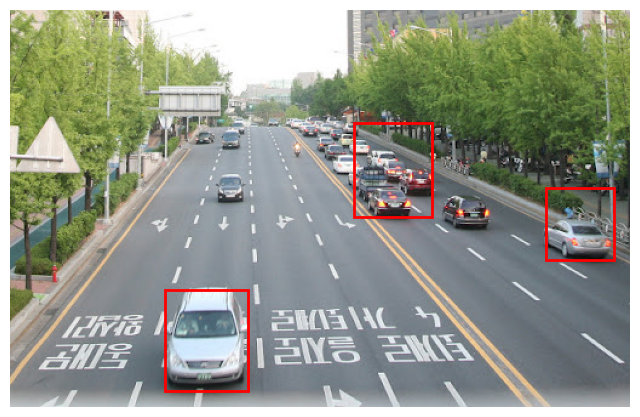

In [19]:
import torch
import matplotlib.pyplot as plt
from PIL import Image

image11_path = "/Users/jiwonchoi/comento/1/api_test.png"
pil_image = Image.open(image11_path).convert("RGB")

# 모델 예측
with torch.no_grad():
    results = model(pil_image)

# PIL 이미지를 Matplotlib로 표시
plt.figure(figsize=(8, 6))
plt.imshow(pil_image)
plt.axis("off")  # 축 제거

# 결과 출력 (예제: YOLOv5, YOLOv8 같은 모델이라면 results[0].boxes.xyxy 사용)
if hasattr(results[0], 'boxes'):  # YOLO 모델의 경우
    detections = results[0].boxes.xyxy.cpu().numpy()  # 바운딩 박스 좌표 가져오기
    for box in detections:
        x1, y1, x2, y2 = box[:4]  # 바운딩 박스 좌표
        plt.gca().add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, 
                                          fill=False, edgecolor='red', linewidth=2))

plt.show()


In [ ]:
'''
from PIL import Image
import io
import torch
import torch.nn as nn
from PIL import Image
from torchvision import transforms
from fastapi import FastAPI, UploadFile, File
import uvicorn
from pyngrok import ngrok
import nest_asyncio

app = FastAPI()

# YOLO 모델 불러오기 (YOLOv11에 맞는 모델 로딩 필요)
# 예시로 model = torch.hub.load(...) 또는 모델을 다른 방식으로 로딩하세요.
# model = ...

@app.post('/detect')
async def detect_api(file: UploadFile = File(...)):
    try:
        # 업로드된 이미지 파일을 읽기
        image_bytes = await file.read()
        image = Image.open(io.BytesIO(image_bytes)).convert("RGB")

        # 이미지 전처리
        transform = transforms.Compose([
            transforms.Resize((640, 640)),  # 모델에 맞는 크기로 조정 (예: 640x640)
            transforms.ToTensor(),          # Tensor로 변환
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # 정규화 (필요시)
        ])

        image_tensor = transform(image).unsqueeze(0)  # 배치 차원 추가 (batch_size=1)
        image_tensor = image_tensor.to(torch.float32)

        # 모델 추론 수행
        results = model(image_tensor)  # YOLO 모델에 입력

        # 결과를 처리하여 JSON 응답 생성
        detections_list = []
        for det in results.xyxy[0]:  # YOLOv11의 결과 형식
            detections_list.append({
                "x1": float(det[0]),
                "y1": float(det[1]),
                "x2": float(det[2]),
                "y2": float(det[3]),
                "confidence": float(det[4]),
                "class": int(det[5])
            })

        return {"detections": detections_list}

    except Exception as e:
        return {"error": "이미지 처리 실패", "details": str(e)}

# 기존 ngrok 세션 종료
ngrok.kill()

# ngrok 인증 토큰 설정 & 터널 시작
authtoken = "2r20wWaMfVz9lU1e97XJSDdF2yn_4o6cwC1j2oNbbK2TJZTHo"
ngrok.set_auth_token(authtoken)
port = 8000
public_url = ngrok.connect(port)
print(f"Public URL: {public_url}")

# Colab 환경에서 비동기 실행 문제 해결
nest_asyncio.apply()

# FastAPI 실행
uvicorn.run(app, host="0.0.0.0", port=port)
'''

Public URL: NgrokTunnel: "https://021d-59-16-51-223.ngrok-free.app" -> "http://localhost:8000"


INFO:     Started server process [32982]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)


INFO:     59.16.51.223:0 - "GET / HTTP/1.1" 404 Not Found
INFO:     59.16.51.223:0 - "GET / HTTP/1.1" 404 Not Found
INFO:     59.16.51.223:0 - "GET /docs HTTP/1.1" 200 OK
INFO:     59.16.51.223:0 - "GET /openapi.json HTTP/1.1" 200 OK
INFO:     59.16.51.223:0 - "POST /detect HTTP/1.1" 200 OK
INFO:     59.16.51.223:0 - "POST /detect HTTP/1.1" 200 OK
INFO:     59.16.51.223:0 - "GET / HTTP/1.1" 404 Not Found
INFO:     59.16.51.223:0 - "GET / HTTP/1.1" 404 Not Found
INFO:     59.16.51.223:0 - "GET /docs HTTP/1.1" 200 OK
INFO:     59.16.51.223:0 - "GET /openapi.json HTTP/1.1" 200 OK
INFO:     59.16.51.223:0 - "POST /detect HTTP/1.1" 200 OK
INFO:     59.16.51.223:0 - "POST /detect HTTP/1.1" 200 OK


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [32982]
